# Анализ результатов A/B теста крупного интернет магазина

Проведем анализ результатов А/В тестов крупного интернет-магазина. 

Отобран список из 9ти гипотез для увеличения выручки.
Задача: приоритизировать гипотезы, провести анализ результатов А/В теста.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import seaborn as sns

In [2]:

data = pd.read_csv('//datasets/hypothesis.csv', sep=',')
display(data)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
data.columns = map(str.lower, data.columns) # заменили название столбцов на нижний регистр для удобства
display(data)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


## Приоритизация гипотез


### Посчитаем  ICE - (impact, confidence, effort / ease «влияние, уверенность, усилия / простота») для гипотез. 


In [4]:
data['ICE']=data['impact']*data['confidence']/data['efforts'] # ICE=impact*confidence|effort

display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее приоритетная - 8я гипотеза по способу приоритизации ICE. 0я и 7я следующие по приоритету.

### Посчитаем RICE
(Reach — это охват
Impact — влияние
Confidence — уверенность в вашей оценке охвата, влияния и трудозатрат
Effort — трудозатраты)

In [5]:
data['RICE']=data['reach']*data['impact']*data['confidence']/data['efforts'] # RICE = reach*impact*confidence/effort

display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


По способу приоритезации RICE (R от англ. reach, «охват») наиболее приоритетной оказвается 7я гипотеза, а 8я перемещается в середину приоритетов. 2я и 0я  - следующие по приоритету RICE.

In [6]:
display(data.sort_values(by='RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Вывод

Reach - количество пользователей(людей) увидят изменения или на какое количество людей повлияют новинки. В 7й гипотезе ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") параметр reach наибольший из возможных - 10, и он существенно влияет на расчет по методу RICE. Это говорит о том, что изменения, которые описаны в 7й гипотезе повлияют на всех покупателей интернет-магазина. Метод ICE более субъективный, оценка Impact - влияние - показывает, насколько ваша идея положительно повлияет на ключевой показатель, который вы пытаетесь улучшить. В данном контексте предлагаю в первую очередь проверить гипотезы под номерами: 7, 2 и 0. А далее на основе вновь полученных данных переназначить оценки.

## Анализ A/B-теста

In [7]:
orders = pd.read_csv('///datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 
display(orders.head(10))
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

Пропущенных значений нет в таблице заказов. Поле 'date' сразу приведем к нужному типу - date в формате: ГГГГ-ММ-ДД

In [8]:
visitors = pd.read_csv('////datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(visitors.head(10))
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Пропущенных значений нет в таблице посетителей. Поле 'date' сразу приведем к нужному типу - date

In [9]:
# посчитаем дубликаты в таблицах
display("Кол-во дубликатов в таблице заказов:",orders.duplicated().sum())
display("Кол-во дубликатов в таблице пользователей:",visitors.duplicated().sum())

'Кол-во дубликатов в таблице заказов:'

0

'Кол-во дубликатов в таблице пользователей:'

0

Явных дубликатов нет в обеих таблицах нет. Проверим распределение по группам в таблице посетителей.

In [10]:
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

Распределение по группам равномерное. Проверим нет ли данных, присутствующих в обеих группах.

In [11]:
len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))

58

In [12]:
display("всего заказов:",len(orders['visitorId']))

'всего заказов:'

1197

58 значений, которые попали в обе группы. Посмотрим какой эти процент общего числа заказов.


In [13]:
display(len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))/len(orders['visitorId']))

0.04845446950710108

5% значений, которые присутствуют в обеих группах. Это допустимая погрешность.

In [14]:
print("ORDERS_DATE", orders["date"].describe())
print("VISITORS_DATE", visitors["date"].describe())


ORDERS_DATE count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object
VISITORS_DATE count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object


/tmp/ipykernel_136/2719014281.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print("ORDERS_DATE", orders["date"].describe())
/tmp/ipykernel_136/2719014281.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print("VISITORS_DATE", visitors["date"].describe())


Даты начала и окончания сбора данных в обеих таблицах совпадают.

Таким образом, проверили:
    * дубликатов в данных нет,
    * пропусков в данных нет,
    * групп, участвующих в тесте 2: А и В, где количество пользователей распределено равномерно.
    * данные представлены в правильных типах(даты изменены на тип date), даты начала и окончания тестов в обеих таблицах совпадают.
    * есть пересекающиеся данные в обеих группах, но мы их удалять не стали, так как их число менее 5%. В дальнейшем необходимо обратить на это внимание.

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [16]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(10)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


### Построим графики кумулятивных метрик

#### Построим график кумулятивной выручки по группам

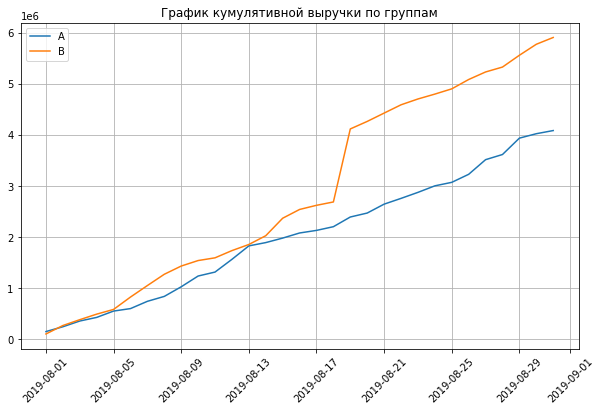

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig = plt.figure(figsize=[10,6])
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45)
plt.grid(b=True)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В в точке 2019-08-18 резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### Построим график кумулятивного среднего чека по группам. 

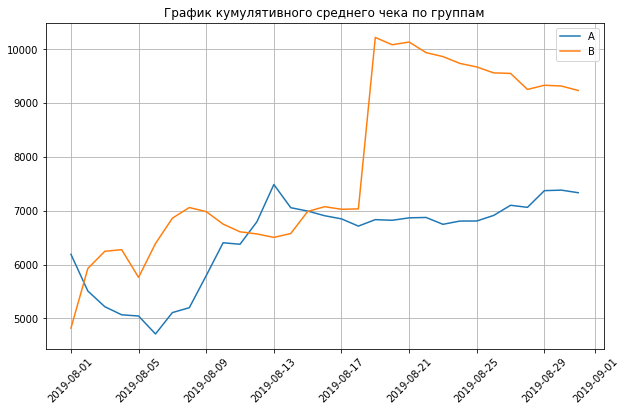

In [19]:
fig = plt.figure(figsize=[10,6])
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45)
plt.grid(b=True)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.legend() 

Кумулятивное значение среднего чека по группам колеблется. Особенно заметен резкий скачок у группы В. 
Возможно, в группу B в районе 2019-08-18 попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. И в группе А есть резкий рост в начале теста. Но сказать, что средний чек установился, пока невозможно. Принимать решения по данной метрике рано и требуется анализ выбросов, которые сильно влияют на данные.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

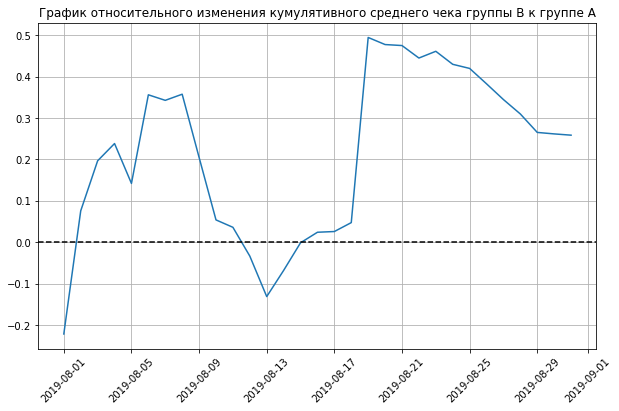

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=[10,6])
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.grid(b=True)
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Результаты теста значительно меняются в разные даты, в том числе 2019-08-18 также есть всплеск. Похоже, что именно в эти даты совершены аномальные заказы.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам

In [21]:
# считаем кумулятивную отношение среднего количества заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

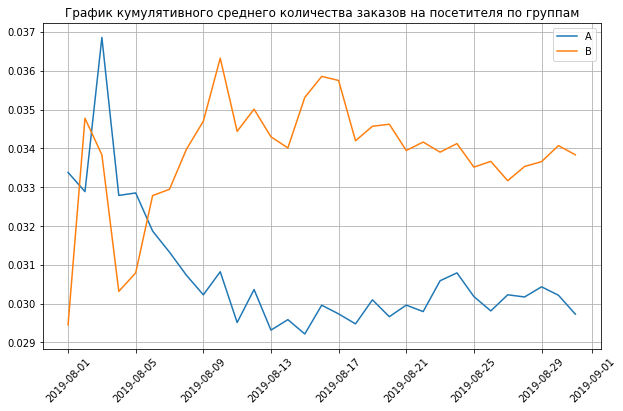

In [22]:
# строим графики
fig = plt.figure(figsize=[10,6])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=45)
plt.grid(b=True)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


У обоих групп в первые дни резкие скачки, а потом падение. Но в группе В падение существеннее, чем в А. Говорить о стабилизации около какого-то значения для обеих групп пока рано - скачки кумулятивного среднего количества заказов на посетителя продолжаются.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

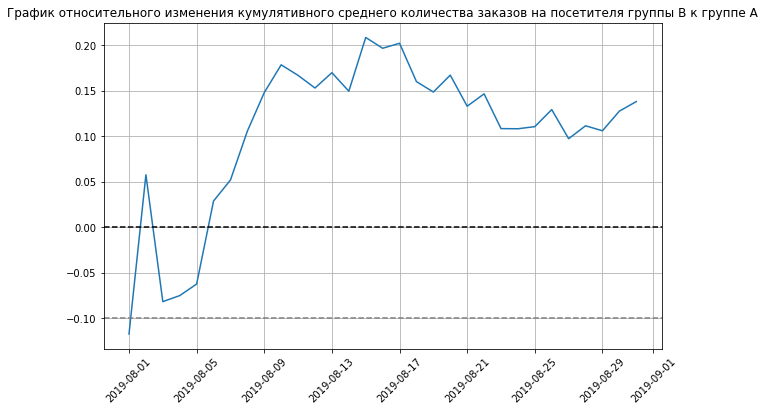

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=[10,6])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=45)
plt.grid(b=True)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

В начале теста группа B выигрывала у группы A, достигая до 20% прироста, далее резкое падение, но затем группа B стабильно и постепенно растёт с небольшими колебаниями. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

#### Построим точечный график количества заказов по пользователям.

In [24]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
# Подсчитаем количество заказов по пользователям
ordersByUsers.columns = ['visitorId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


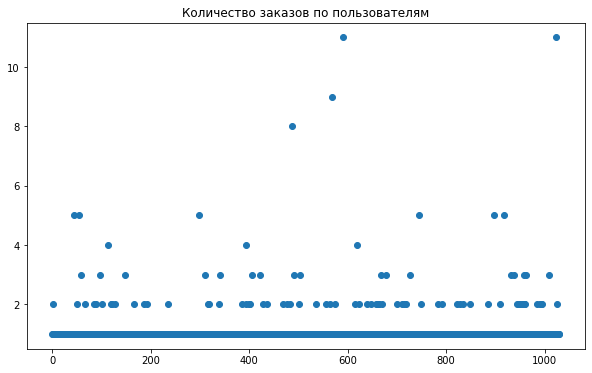

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))

fig = plt.figure(figsize=[10,6])
plt.title('Количество заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

В основном заказывают 1 раз, но пользователей с 2мя заказами тоже значимое количество, но 3-4 заказа делает достаточно пользователей. А вот пользователей с количеством заказов больше 4 - мало. 

### Проведем анализ аномалий и выбросов

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

Точная доля пользователей с большим количеством заказов не ясна. Непонятно, считать их аномалиями или нет. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Посчитаем выборочные перцентили количества заказов на одного пользователя, чтобы принять решение по аномальным значениям.

In [26]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
display(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

array([1., 2., 4.])

Менее 5% пользователей заказывают более 2х раз. Возьмем число заказов - 2 ,  как верхнюю границу и отсеем аномальные значения.

In [27]:
ob=int(np.percentile(ordersByUsers['orders'], [95])) # граница количества аномальных заказов
print(ob)

2


#### Построим точечный график стоимостей заказов

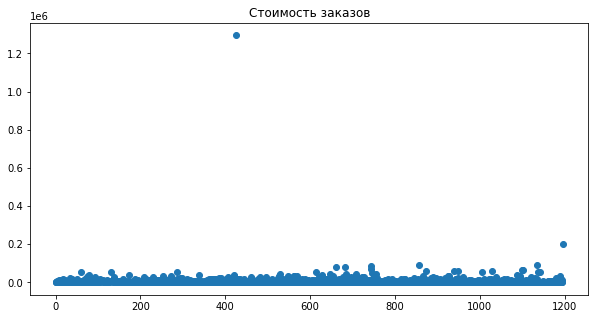

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

fig = plt.figure(figsize=[10,5])
plt.title('Стоимость заказов')

plt.scatter(x_values, orders['revenue'])

Большинство заказов стоимостью около 10000. Но также наблюдаем аномальные выбросы. Есть даже заказ стоимостью более 1.2 миллиона. Его стоимость существенно влияет на результаты исследований. 

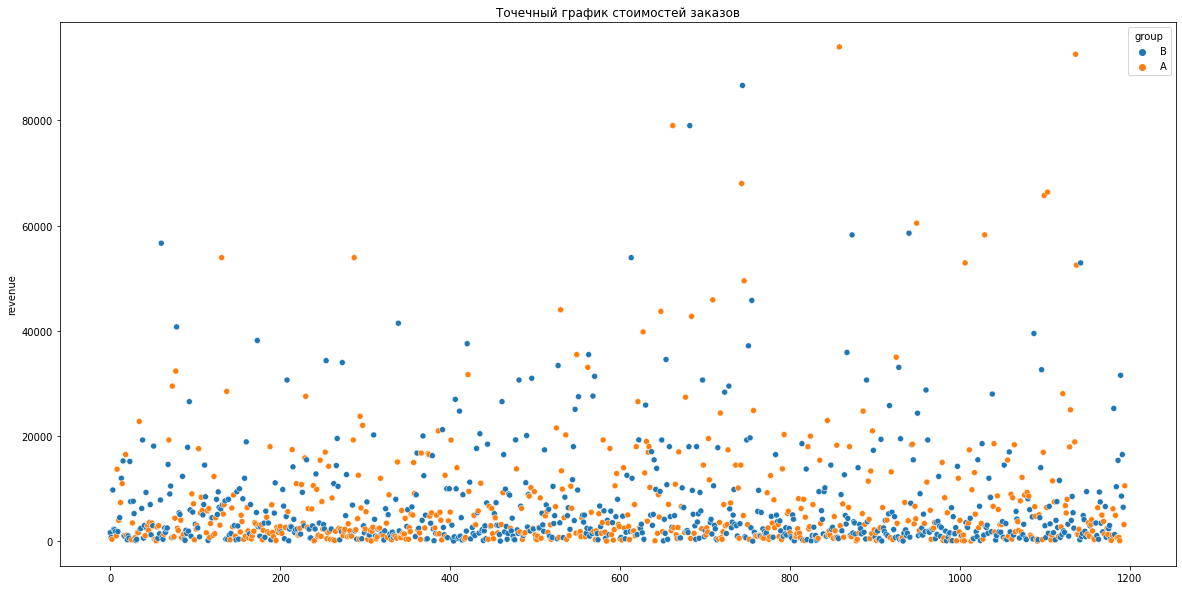

In [29]:
orders_mean = orders.query('revenue<200000')

x_values = pd.Series(range(0,orders_mean['revenue'].count()))
plt.figure(figsize=(20, 10))
sns.scatterplot(x=x_values, y="revenue", hue="group", data=orders_mean)
plt.title('Точечный график стоимостей заказов');


Чтобы отфильтровать аномальные значения, вновь посчитаем перцентили.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [30]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


In [31]:
rb=int(np.percentile(orders['revenue'], [95])) # граница аномальных значений стоимости заказа

Менее 5% заказов были дороже 28 000. И менее 1% заказов дороже 58233. Возьмем 28000 за границу отсечения аномальных значений. 

### Сформулируем гипотезы и посмотрим на статистические значимости различий метрик

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. 
H0 - Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 
H1 - Альтернативная: различия в среднем между группами есть.



In [32]:
# Считаем количество пользователей до выбранной даты включительно в группах A и B;

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Считаем суммарное число заказов до выбранной даты включительно в группах A и B
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


# Получаем таблицу с количеством заказов, выручкой в день, количество заказов и выручка до выбранной даты(включительно)
# Количество пользователей до выбранной даты 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['transactionId', 'visitorId']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
Тем, кто ничего не заказал, будут соответствовать нули. 
Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная sampleA должна состоять из двух частей:
Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
Нули для пользователей, которые ничего не заказывали. 
Их количество равно разнице между суммой посетителей и количеством записей о заказах: 
data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). 
Создадим объект pd.Series нужной длины.

In [33]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [34]:
print("p-value: ""{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов группы B: ""{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.017
Относительный прирост среднего числа заказов группы B: 0.138


Первое число — p-value = 0.017 меньше 0.05 (5%). Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем. 
Как мы видим, среднее число заказов группы В действительно больше, практически на 14%, чем у группы А. Статистическая значимость присутствует.



#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов и найдём относительные различия в среднем чеке между группами.
Н0- нулевая гипотеза: Средний чек заказов для групп A и В совпадает
Н1- альтернативная: Средний чек заказов для групп A и В различаются

In [35]:
print("p-value: ""{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный прирост среднего чека группы B: ""{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительный прирост среднего чека группы B: 0.259


P-value значительно больше 0.05. Значит, нельзя отвегнуть нулевую гипотезу: в среднем чеке заказа между группами различий нет.

Впрочем, средний чек группы B почти на 26% выше среднего чека группы A.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

За аномальных пользователей были приняты те, кто совершил от 3 заказов или совершил заказ дороже 
28000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape()

In [36]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > ob]['userId'], ordersByUsersB[ordersByUsersB['orders'] > ob]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > rb]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
display("Всего аномальных пользователей: {}".format(abnormalUsers.shape))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

'Всего аномальных пользователей: (74,)'

Всего 74 аномальных пользователя. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

Воспользуемся критерием Манна-Уитни для разности двух долей. Сформулируем гипотезы:

H0 - нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет

H1 - альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [37]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [38]:
print("p-value: ""{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост среднего числа заказов группы B по очищенным данным: ""{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
Относительный прирост среднего числа заказов группы B по очищенным данным: 0.173


Было по "сырым данным": 0.017 и 0.138. Первое число еще уменьшилось — p-value = 0.013 меньше 0.05 (5%). Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем.  Как мы видим,  среднего количества заказов на посетителя по группам группы В действительно больше и при очищенных данных, практически на 17%. При сырых данных прирост был почти 14%, то есть почти на 3% увеличился прирост числа заказов группы В по очищенным данным. Статистическая значимость присутствует.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Воспользуемся критерием Манна-Уитни для разности двух долей. Сформулируем гипотезы:

H0 - нулевая гипотеза: Средний чек заказов для групп A и В совпадает

H1 - альтернативная: Средний чек заказов для групп A и В различаются

In [39]:
print("p-value: ""{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный прирост среднего чека группы B по очищенным данным: ""{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.738
Относительный прирост среднего чека группы B по очищенным данным: -0.020


Было на "сырых данных" - 0.729 и 0.259. P-value практически не изменился, а разница между сегментами сильно изменилась. Очищенные данные показывают, что средний чек группы B уступает группе A на 2%, в то время как на сырых данных чек группы B был на 26% больше.

И на это явно повлиял наш "миллионный" чек, который отсутствует в очищенных данных. Получается убрали аномальный заказ и средние чеки групп А иВ практически сравнялись.

## Вывод по А/В тесту

Мы видим данные по среднему чеку еще не "устаканились". Если нам важен этот показатель, то тест следует продолжнить. Если нас больше интересует только  среднее количества заказов на посетителя по группам, то тест можно прекращать, гипотеза об увеличении этой метрики на 17 % подтвердилась. Предположу, что нам важны оба показателя, следовательно тест следует продолжить. С другой стононы у нас P-value среднего чека значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Тем более, что при очищенных данных, которые не учитывают единичные случаи аномально больших заказов, видно, что средние чеки примерно равны.

**Вывод:**

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после очистки от аномалий.
* Как по сырым, так и по очищенным данным нет статистически значимого различия по среднему чеку между группами.
* График различия среднего количества заказов на посетителя по группам сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту и практически зафиксировались. И есть статистически значимое различие среднего количества заказов на посетителя по группам и относительный прирост среднего количества заказов на посетителя группы B около 17%.
* График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

* Кроме этого, в процессе работы с данными было выяснено, что некоторые пользователи могли видеть как одну версию сайта, так и другую, что нарушает один из основных принцип работы A/B-теста - один пользователь видит только одну версию на всём протяжении теста.

В связи с этим, рекомендую проверить корректность метода показа пользователям различных версии сайта и поправить его, чтобы одному и тому же пользователю показывалась только та версия сайта, которую он увидел при первом визите (версия той группы теста, куда он входит).

**Решение: На основании результатов, можно остановить тест и зафиксировать победу группы B.**